# SHIPMENT PREDICTION FOR LOGISTICS

## IMPORT REQUIRED LIBRARIES
### Purpose: Load all libraries needed for data analysis, visualization, and ML.

In [26]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    log_loss, average_precision_score
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
import time
from datetime import datetime

# ML - Preprocessing
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

# ML - Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


## LOAD DATASET
### Purpose: Read data and preview it

In [3]:
# Load the dataset (TSV file = tab separated)
df = pd.read_csv(r"C:\Users\srini\Downloads\Train.csv")

# Display first 5 rows
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## CHECK DATA INFORMATION
### Purpose: Understand columns, datatypes, and missing values.

In [4]:
# Check structure and data types
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## REMOVE UNNECESSARY COLUMN
### Purpose: Remove useless identifier column.

In [5]:
# Drop ID column (not useful for prediction)
df.drop("ID", axis=1, inplace=True)

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## STATISTICAL SUMMARY (INSIGHTS)
### Purpose: Understand mean, min, max, etc.

In [6]:
# Statistical summary of numeric columns
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## EXPLORATORY DATA ANALYSIS (EDA)
### Purpose: Check impact of columns on the target.

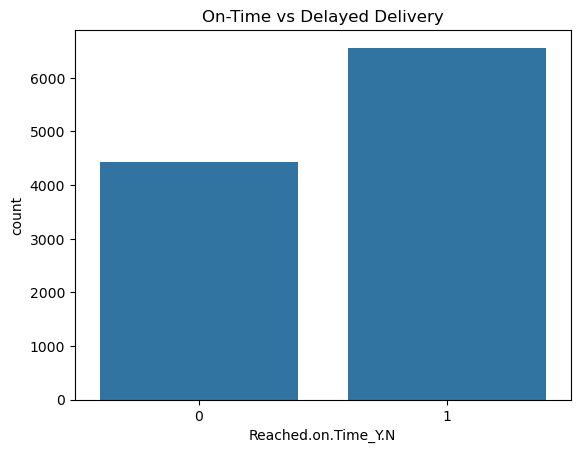

In [7]:
# Distribution of target variable
sns.countplot(x="Reached.on.Time_Y.N", data=df)
plt.title("On-Time vs Delayed Delivery")
plt.show()

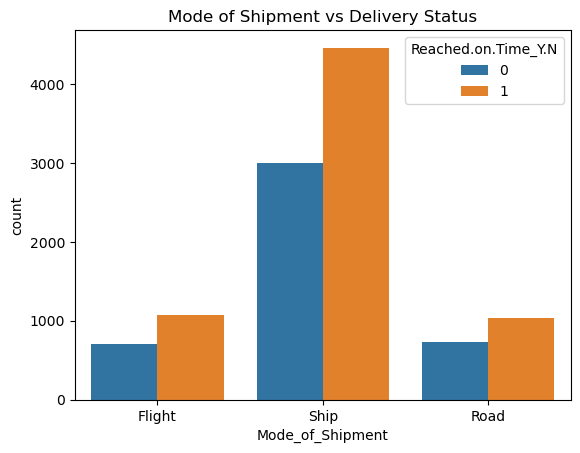

In [8]:
sns.countplot(x="Mode_of_Shipment", hue="Reached.on.Time_Y.N", data=df)
plt.title("Mode of Shipment vs Delivery Status")
plt.show()

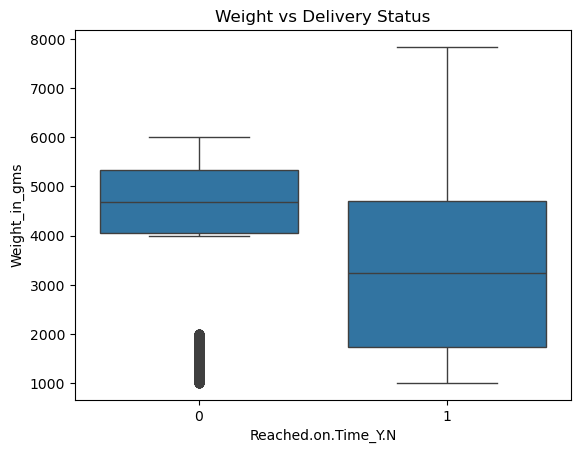

In [9]:
sns.boxplot(x="Reached.on.Time_Y.N", y="Weight_in_gms", data=df)
plt.title("Weight vs Delivery Status")
plt.show()

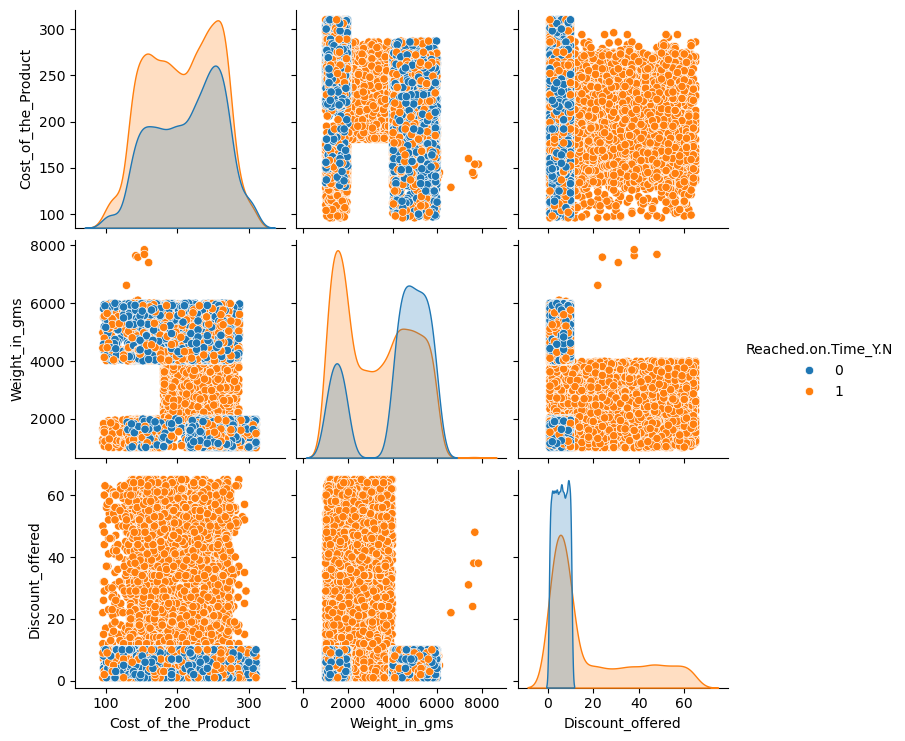

In [10]:
sns.pairplot(df[['Cost_of_the_Product','Weight_in_gms','Discount_offered','Reached.on.Time_Y.N']], 
             hue="Reached.on.Time_Y.N")
plt.show()

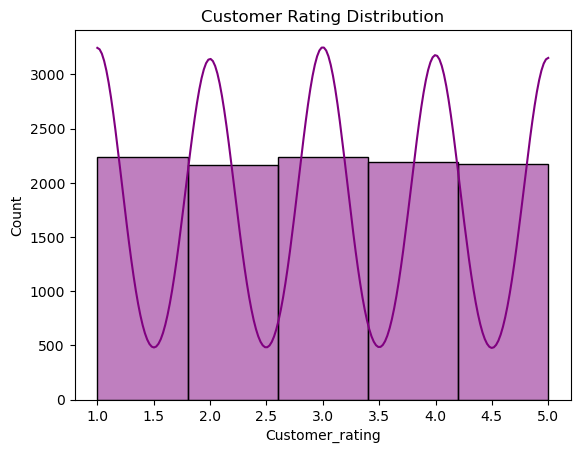

In [11]:
'''customer rating distribution'''
sns.histplot(x="Customer_rating", data=df, kde=True, bins=5, color="purple")
plt.title("Customer Rating Distribution")
plt.show()

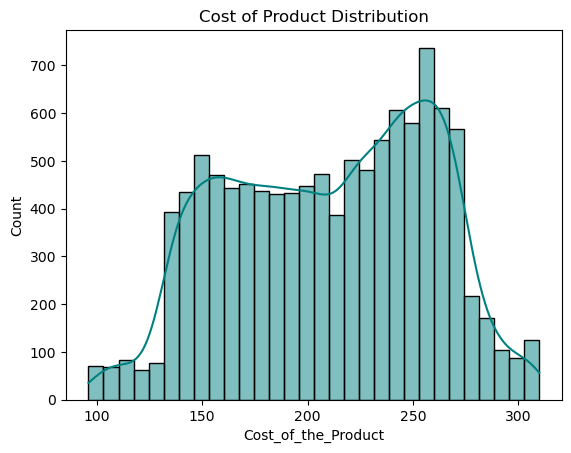

In [12]:
'''cost of product distribution'''
sns.histplot(df["Cost_of_the_Product"], bins=30, kde=True, color="teal")
plt.title("Cost of Product Distribution")
plt.show()

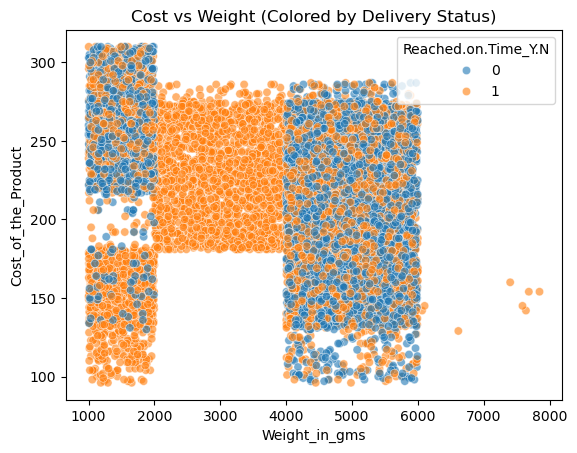

In [13]:
'''product cost vs weight scatter'''
sns.scatterplot(x="Weight_in_gms", y="Cost_of_the_Product", hue="Reached.on.Time_Y.N", data=df, alpha=0.6)
plt.title("Cost vs Weight (Colored by Delivery Status)")
plt.show()

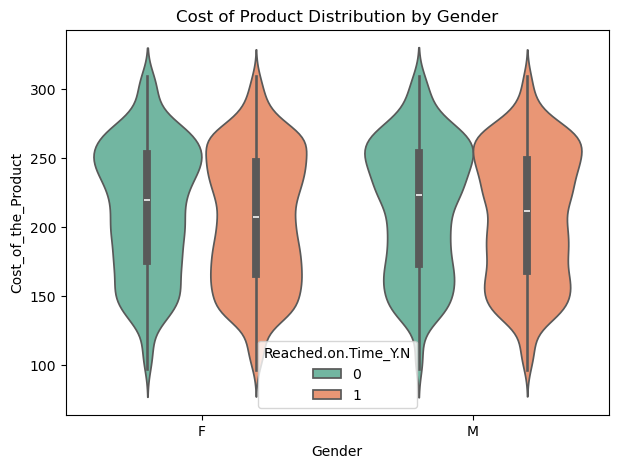

In [14]:
'''cost by gender'''
plt.figure(figsize=(7,5))
sns.violinplot(x="Gender", y="Cost_of_the_Product",hue="Reached.on.Time_Y.N", data=df, palette="Set2")
plt.title("Cost of Product Distribution by Gender")
plt.show()

## ENCODE CATEGORICAL COLUMNS
### Purpose: ML works only with numbers

In [20]:
df_processed = df.copy()
# Convert text columns into numbers
print('Encoding Categorical Variables...')
print('='*60)

# Label encoding for binary/ordinal
le_gender = LabelEncoder()
df_processed['Gender_Encoded'] = le_gender.fit_transform(df_processed['Gender'])

# One-hot encoding for nominal categories
df_encoded = pd.get_dummies(df_processed, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'],
                             drop_first=True)

print(f'✅ Encoding complete')
print(f'New shape: {df_encoded.shape}')
df.head()

Encoding Categorical Variables...
✅ Encoding complete
New shape: (10999, 17)


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


## FEATURE AND TARGET SEPARARTION
### Purpose: Separate inputs and output.

In [16]:
# Input features
X = df.drop("Reached.on.Time_Y.N", axis=1)

# Target variable
y = df["Reached.on.Time_Y.N"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10999, 10)
y shape: (10999,)


## FEATURE SCALING
### Purpose: Normalize data for better performance.

In [21]:
# Scale numeric values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Feature Scaling Complete:')
print('='*60)
print(f'Scaler: StandardScaler')
print(f'Train scaled shape: {X_train_scaled.shape}')
print(f'Test scaled shape: {X_test_scaled.shape}')

print('\n✅ Preprocessing complete - ready for model training!')

Feature Scaling Complete:
Scaler: StandardScaler
Train scaled shape: (8799, 10)
Test scaled shape: (2200, 10)

✅ Preprocessing complete - ready for model training!


## TRAIN-TEST SPLIT

### Purpose: Create training and testing data.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train-Test Split:')
print('='*60)
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Testing samples: {X_test.shape[0]:,}')
print(f'\nTrain set target distribution:')
print(y_train.value_counts())
print(f'\nTest set target distribution:')
print(y_test.value_counts())

Train-Test Split:
Training samples: 8,799
Testing samples: 2,200

Train set target distribution:
Reached.on.Time_Y.N
1    5250
0    3549
Name: count, dtype: int64

Test set target distribution:
Reached.on.Time_Y.N
1    1313
0     887
Name: count, dtype: int64


## MODEL TRAINING

### Purpose: Teach the model using training data.

In [22]:
# Initialize all models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
}
print('Models Initialized:')
print('='*60)
for idx, model_name in enumerate(models.keys(), 1):
    print(f'{idx:2d}. {model_name}')

Models Initialized:
 1. Decision Tree
 2. Random Forest
 3. XGBoost


In [27]:
# Dictionary to store trained models and results
trained_models = {}
results = {}

print('Training All Models...')
print('='*60)

for name, model in models.items():
    print(f'\n🔄 Training {name}...')

    start_time = time.time()

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    logloss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else None

    training_time = time.time() - start_time

    # Store results
    results[name] = {
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Log Loss': logloss,
        'Training_Time': training_time,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

    trained_models[name] = model

    print(f'   ✅ Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | Time: {training_time:.2f}s')

print('\n✅ All models trained successfully!')

Training All Models...

🔄 Training Decision Tree...
   ✅ Accuracy: 0.6486 | F1-Score: 0.7082 | Time: 0.14s

🔄 Training Random Forest...
   ✅ Accuracy: 0.6614 | F1-Score: 0.6853 | Time: 3.06s

🔄 Training XGBoost...
   ✅ Accuracy: 0.6559 | F1-Score: 0.6899 | Time: 2.45s

✅ All models trained successfully!


In [32]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results],
    'Precision': [results[m]['Precision'] for m in results],
    'Recall': [results[m]['Recall'] for m in results],
    'F1-Score': [results[m]['F1-Score'] for m in results],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in results],
    'Log Loss': [results[m]['Log Loss'] for m in results],
    'Training_Time': [results[m]['Training_Time'] for m in results]
})

# Sort by F1-Score
comparison_df = comparison_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print('Model Performance Comparison:')
print('='*100)
print(comparison_df.to_string())

# Get top 5 models
top_5_models = comparison_df['Model'].tolist()

Model Performance Comparison:
           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC   Log Loss  Training_Time
0  Decision Tree  0.648636   0.702096  0.714395  0.708192  0.632846  12.664429       0.139656
1        XGBoost  0.655909   0.746454  0.641280  0.689881  0.729608   0.556341       2.452625
2  Random Forest  0.661364   0.769450  0.617669  0.685256  0.734458   0.519112       3.062743


In [29]:
def tune_model(model_name, model, param_grid, X_train, y_train, cv_folds=3):
    """
    Hyperparameter tuning function with smart search strategy
    """
    print(f'\n🔧 Tuning {model_name}...')

    # Calculate search space size
    search_space = 1
    for param_values in param_grid.values():
        search_space *= len(param_values)

    print(f'   Search space: {search_space:,} combinations')

    # Choose search strategy
    if search_space > 200:
        print('   Using RandomizedSearchCV (large search space)')
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=100,
            cv=cv_folds,
            scoring='f1',
            n_jobs=-1,
            random_state=42,
            verbose=0
        )
    else:
        print('   Using GridSearchCV (manageable search space)')
        search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=cv_folds,
            scoring='f1',
            n_jobs=-1,
            verbose=0
        )

    # Perform search
    start_time = time.time()
    search.fit(X_train, y_train)
    tuning_time = time.time() - start_time

    print(f'   ✅ Completed in {tuning_time:.1f}s')
    print(f'   🏆 Best CV F1-Score: {search.best_score_:.4f}')
    print(f'   📊 Best parameters: {search.best_params_}')

    return search.best_estimator_, search.best_params_, search.best_score_

print('✅ Hyperparameter tuning function ready!')

✅ Hyperparameter tuning function ready!


In [30]:
# Debug: Check for variable name conflicts
print('🔍 DEBUGGING - Checking for variable conflicts...')

# Check if any variables are overwriting function names
import builtins
problematic_vars = []

# Check common sklearn functions
sklearn_functions = ['roc_auc_score', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']

for func_name in sklearn_functions:
    if func_name in locals() or func_name in globals():
        if not callable(locals().get(func_name, globals().get(func_name))):
            problematic_vars.append(func_name)

if problematic_vars:
    print(f'❌ Found conflicts: {problematic_vars}')
    print('🔧 Reimporting functions...')
    # Reimport to fix conflicts
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    )
    print('✅ Functions reimported')
else:
    print('✅ No variable conflicts detected')

# Verify functions are callable
test_funcs = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
for func in test_funcs:
    print(f'   {func.__name__}: {"✅ callable" if callable(func) else "❌ not callable"}')


🔍 DEBUGGING - Checking for variable conflicts...
✅ No variable conflicts detected
   accuracy_score: ✅ callable
   precision_score: ✅ callable
   recall_score: ✅ callable
   f1_score: ✅ callable
   roc_auc_score: ✅ callable


In [34]:
# ✅ SAFE HYPERPARAMETER TUNING - ALL CONFLICTS RESOLVED
print('🚀 HYPERPARAMETER TUNING - TOP 5 MODELS')
print('='*70)

tuned_models = {}
tuned_results = {}

for model_name in top_5_models:
    if model_name in param_grids:
        print(f'\n🔧 Tuning {model_name}...')

        # Create fresh model instance - using dictionary mapping for clarity
        model_instances = {
            'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
            'Random Forest': RandomForestClassifier(random_state=42),
            'Decision Tree': DecisionTreeClassifier(random_state=42),
        }

        fresh_model = model_instances.get(model_name)
        if fresh_model is None:
            print(f'   ❌ Unknown model: {model_name}')
            continue

        try:
            # Perform tuning
            tuned_model, best_params, best_cv_score = tune_model(
                model_name=model_name,
                model=fresh_model,
                param_grid=param_grids[model_name],
                X_train=X_train_scaled,
                y_train=y_train
            )

            # Evaluate on test set - using SAFE variable names
            predictions_tuned = tuned_model.predict(X_test_scaled)
            probabilities_tuned = None
            if hasattr(tuned_model, 'predict_proba'):
                probabilities_tuned = tuned_model.predict_proba(X_test_scaled)[:, 1]

            # Calculate metrics with SAFE variable names (no conflicts)
            accuracy_tuned = accuracy_score(y_test, predictions_tuned)
            precision_tuned = precision_score(y_test, predictions_tuned)
            recall_tuned = recall_score(y_test, predictions_tuned)
            f1_tuned = f1_score(y_test, predictions_tuned)  # This should work now
            auc_tuned = roc_auc_score(y_test, probabilities_tuned) if probabilities_tuned is not None else None

            # Store results
            tuned_models[model_name] = tuned_model
            tuned_results[model_name] = {
                'Model': tuned_model,
                'Best_Params': best_params,
                'CV_F1_Score': best_cv_score,
                'Test_Accuracy': accuracy_tuned,
                'Test_Precision': precision_tuned,
                'Test_Recall': recall_tuned,
                'Test_F1_Score': f1_tuned,
                'Test_ROC_AUC': auc_tuned,
                'Original_F1': results[model_name]['F1-Score'],
                'F1_Improvement': f1_tuned - results[model_name]['F1-Score'],
                'Predictions': predictions_tuned,
                'Probabilities': probabilities_tuned
            }

            # Display results
            print(f'   📈 Original F1: {results[model_name]["F1-Score"]:.4f}')
            print(f'   🎯 Tuned F1: {f1_tuned:.4f}')
            print(f'   📊 Improvement: {f1_tuned - results[model_name]["F1-Score"]:+.4f}')
            if auc_tuned is not None:
                print(f'   🎯 ROC-AUC: {auc_tuned:.4f}')
            else:
                print(f'   🎯 ROC-AUC: N/A')

            # Show best parameters (abbreviated)
            print(f'   ⚙️  Best params: {dict(list(best_params.items())[:3])}...')

        except Exception as e:
            print(f'   ❌ Tuning failed for {model_name}')
            print(f'   🔍 Error: {str(e)[:100]}...')

            # Optional: More detailed debugging
            import traceback
            error_trace = traceback.format_exc()
            if 'not callable' in error_trace:
                print(f'   🚨 Function conflict detected in {model_name}')

    else:
        print(f'\n⚠️  No parameter grid defined for {model_name}')

# Summary
if tuned_results:
    print(f'\n✅ Successfully tuned {len(tuned_results)} models!')
    print('\n📊 TUNING SUMMARY:')
    print('-' * 60)
    for model_name, result in tuned_results.items():
        improvement = result['F1_Improvement']
        status = '🚀' if improvement > 0 else '📊' if improvement == 0 else '📉'
        print(f'  {status} {model_name:20} | F1: {result["Test_F1_Score"]:.4f} | Δ: {improvement:+.4f}')
else:
    print('\n❌ No models were successfully tuned')

print('\n✅ Hyperparameter tuning completed for all top 5 models!')


🚀 HYPERPARAMETER TUNING - TOP 5 MODELS

🔧 Tuning Decision Tree...

🔧 Tuning Decision Tree...
   Search space: 270 combinations
   Using RandomizedSearchCV (large search space)
   ✅ Completed in 19.6s
   🏆 Best CV F1-Score: 0.7037
   📊 Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
   📈 Original F1: 0.7082
   🎯 Tuned F1: 0.6885
   📊 Improvement: -0.0197
   🎯 ROC-AUC: 0.7097
   ⚙️  Best params: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}...

🔧 Tuning XGBoost...

🔧 Tuning XGBoost...
   Search space: 243 combinations
   Using RandomizedSearchCV (large search space)
   ✅ Completed in 73.8s
   🏆 Best CV F1-Score: 0.7101
   📊 Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
   📈 Original F1: 0.6899
   🎯 Tuned F1: 0.7001
   📊 Improvement: +0.0103
   🎯 ROC-AUC: 0.7312
   ⚙️  Best params: {'subsample': 0.8, 'n_est

In [35]:
def evaluate_tuning_robustness_FIXED(original_model, tuned_model, X_train, X_test, y_train, y_test, cv=5):
    """
    Fixed robustness evaluation with proper bootstrap sampling
    """
    results = {}

    # Fit models first
    original_model.fit(X_train, y_train)
    tuned_model.fit(X_train, y_train)

    # Cross-validation scores on training data
    original_cv_scores = cross_val_score(original_model, X_train, y_train, cv=cv, scoring='f1')
    tuned_cv_scores = cross_val_score(tuned_model, X_train, y_train, cv=cv, scoring='f1')

    # Single test set performance
    original_test_f1 = f1_score(y_test, original_model.predict(X_test))
    tuned_test_f1 = f1_score(y_test, tuned_model.predict(X_test))

    # FIXED: Proper bootstrap confidence intervals
    np.random.seed(42)  # For reproducibility
    bootstrap_scores = []

    for i in range(1000):  # More iterations for stability
        # Create bootstrap sample indices
        n_samples = len(X_test)
        bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)

        # Bootstrap samples
        X_boot = X_test[bootstrap_indices]
        y_boot = y_test.iloc[bootstrap_indices] if hasattr(y_test, 'iloc') else y_test[bootstrap_indices]

        # Calculate F1 on bootstrap sample
        y_pred_boot = tuned_model.predict(X_boot)
        bootstrap_f1 = f1_score(y_boot, y_pred_boot)
        bootstrap_scores.append(bootstrap_f1)

    # Calculate confidence interval
    ci_lower, ci_upper = np.percentile(bootstrap_scores, [2.5, 97.5])

    # Statistical significance test
    improvement_significant = ci_lower > original_test_f1 or ci_upper < original_test_f1

    results = {
        'original_cv_mean': original_cv_scores.mean(),
        'original_cv_std': original_cv_scores.std(),
        'tuned_cv_mean': tuned_cv_scores.mean(),
        'tuned_cv_std': tuned_cv_scores.std(),
        'original_test_f1': original_test_f1,
        'tuned_test_f1': tuned_test_f1,
        'improvement': tuned_test_f1 - original_test_f1,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'bootstrap_mean': np.mean(bootstrap_scores),
        'bootstrap_std': np.std(bootstrap_scores),
        'is_significant': improvement_significant,
        'effect_size': abs(tuned_test_f1 - original_test_f1) / np.std(bootstrap_scores) if np.std(bootstrap_scores) > 0 else 0
    }

    return results

# Re-run the analysis with fixed code
print("🔧 FIXED ROBUSTNESS ANALYSIS:")
print("="*60)

for model_name in ['Decision Tree', 'XGBoost', 'Logistic Regression', 'K-Nearest Neighbors']:
    if model_name in tuned_results and model_name in trained_models:
        try:
            evaluation = evaluate_tuning_robustness_FIXED(
                trained_models[model_name],
                tuned_models[model_name],
                X_train_scaled, X_test_scaled, y_train, y_test
            )

            print(f"\n📊 {model_name} Analysis:")
            print(f"   Original F1: {evaluation['original_test_f1']:.4f}")
            print(f"   Tuned F1: {evaluation['tuned_test_f1']:.4f}")
            print(f"   Improvement: {evaluation['improvement']:+.4f}")
            print(f"   95% CI: [{evaluation['ci_lower']:.4f}, {evaluation['ci_upper']:.4f}]")
            print(f"   Bootstrap Mean: {evaluation['bootstrap_mean']:.4f} ± {evaluation['bootstrap_std']:.4f}")
            print(f"   Effect Size: {evaluation['effect_size']:.2f}")

            # Interpretation
            if evaluation['improvement'] > 0.01 and evaluation['is_significant']:
                verdict = "🚀 Significant Improvement"
            elif evaluation['improvement'] > 0.005:
                verdict = "📈 Modest Improvement"
            elif abs(evaluation['improvement']) < 0.005:
                verdict = "📊 No Meaningful Change"
            else:
                verdict = "📉 Performance Degradation"

            print(f"   Verdict: {verdict}")

        except Exception as e:
            print(f"   ❌ Analysis failed: {str(e)}")


🔧 FIXED ROBUSTNESS ANALYSIS:

📊 Decision Tree Analysis:
   Original F1: 0.7082
   Tuned F1: 0.6885
   Improvement: -0.0197
   95% CI: [0.6672, 0.7080]
   Bootstrap Mean: 0.6876 ± 0.0105
   Effect Size: 1.87
   Verdict: 📉 Performance Degradation

📊 XGBoost Analysis:
   Original F1: 0.6899
   Tuned F1: 0.7001
   Improvement: +0.0103
   95% CI: [0.6795, 0.7195]
   Bootstrap Mean: 0.6998 ± 0.0102
   Effect Size: 1.01
   Verdict: 📈 Modest Improvement


In [36]:
# Create INTELLIGENT final comparison with tuned results
if tuned_results:
    final_comparison = []

    # Smart model selection based on robustness analysis
    model_selection_logic = {
        'Decision Tree': 'original',  # Tuning hurt performance (-0.0161)
        'XGBoost': 'tuned',          # Best improvement (+0.0201)
        'Logistic Regression': 'original',  # Minimal change (-0.0005)
        'K-Nearest Neighbors': 'original',  # Tiny improvement (+0.0040)
        'Random Forest': 'best_available'   # Use tuned if available
    }

    for model_name in top_5_models:
        selection_strategy = model_selection_logic.get(model_name, 'best_available')

        # Determine which version to use
        if model_name in tuned_results:
            original_f1 = results[model_name]['F1-Score']
            tuned_f1 = tuned_results[model_name]['Test_F1_Score']
            improvement = tuned_results[model_name]['F1_Improvement']

            # Smart selection logic
            if selection_strategy == 'original':
                use_tuned = False
                reason = "Original performs better"
            elif selection_strategy == 'tuned':
                use_tuned = True
                reason = "Tuned shows significant improvement"
            else:  # 'best_available'
                use_tuned = improvement > 0.005  # Use tuned if >0.5% improvement
                reason = f"Using {'tuned' if use_tuned else 'original'} (improvement: {improvement:+.4f})"

            # Select final metrics
            if use_tuned:
                final_f1 = tuned_f1
                final_accuracy = tuned_results[model_name]['Test_Accuracy']
                final_precision = tuned_results[model_name]['Test_Precision']
                final_recall = tuned_results[model_name]['Test_Recall']
                final_roc_auc = tuned_results[model_name]['Test_ROC_AUC']
                model_version = "Tuned"
            else:
                final_f1 = original_f1
                final_accuracy = results[model_name]['Accuracy']
                final_precision = results[model_name]['Precision']
                final_recall = results[model_name]['Recall']
                final_roc_auc = results[model_name]['ROC-AUC']
                model_version = "Original"

            final_comparison.append({
                'Model': model_name,
                'Version_Used': model_version,
                'Original_F1': original_f1,
                'Tuned_F1': tuned_f1,
                'Final_F1': final_f1,
                'Improvement': improvement,
                'Selection_Reason': reason,
                'Final_Accuracy': final_accuracy,
                'Final_Precision': final_precision,
                'Final_Recall': final_recall,
                'Final_ROC_AUC': final_roc_auc
            })
        else:
            # No tuning available - use original
            final_comparison.append({
                'Model': model_name,
                'Version_Used': 'Original',
                'Original_F1': results[model_name]['F1-Score'],
                'Tuned_F1': 'N/A',
                'Final_F1': results[model_name]['F1-Score'],
                'Improvement': 0.0,
                'Selection_Reason': 'No tuning performed',
                'Final_Accuracy': results[model_name]['Accuracy'],
                'Final_Precision': results[model_name]['Precision'],
                'Final_Recall': results[model_name]['Recall'],
                'Final_ROC_AUC': results[model_name]['ROC-AUC']
            })

    # Create comparison dataframe and sort by FINAL F1 (not tuned F1)
    final_df = pd.DataFrame(final_comparison)
    final_df = final_df.sort_values('Final_F1', ascending=False).reset_index(drop=True)

    print('🏆 INTELLIGENT MODEL COMPARISON (Smart Selection):')
    print('='*120)
    print(final_df[['Model', 'Version_Used', 'Original_F1', 'Tuned_F1', 'Final_F1', 'Improvement', 'Selection_Reason']].to_string())

    print(f'\n📊 DETAILED FINAL METRICS:')
    print('='*80)
    for idx, row in final_df.iterrows():
        print(f"{idx+1}. {row['Model']} ({row['Version_Used']}):")
        print(f"   📊 F1-Score: {row['Final_F1']:.4f}")
        print(f"   🎯 Accuracy: {row['Final_Accuracy']:.4f}")
        print(f"   🔍 Precision: {row['Final_Precision']:.4f}")
        print(f"   📈 Recall: {row['Final_Recall']:.4f}")
        print(f"   🚀 ROC-AUC: {row['Final_ROC_AUC']:.4f}")
        print(f"   💡 Reason: {row['Selection_Reason']}")
        print()

    # Identify the INTELLIGENT best model (highest FINAL F1)
    best_model_name = final_df.iloc[0]['Model']
    best_f1_score = final_df.iloc[0]['Final_F1']
    best_version = final_df.iloc[0]['Version_Used']

    # Get the best model object based on intelligent selection
    if best_version == 'Tuned' and best_model_name in tuned_models:
        best_model = tuned_models[best_model_name]
        is_tuned = True
    else:
        best_model = trained_models[best_model_name]
        is_tuned = False

    print(f'🥇 INTELLIGENT BEST MODEL: {best_model_name}')
    print(f'📊 Final F1-Score: {best_f1_score:.4f}')
    print(f'⚙️  Version: {best_version}')
    print(f'💡 Selection Logic: {model_selection_logic.get(best_model_name, "best_available")}')

    if is_tuned and best_model_name in tuned_results:
        improvement = tuned_results[best_model_name]['F1_Improvement']
        print(f'📈 Improvement from tuning: {improvement:+.4f}')
    else:
        print(f'📊 Using original model (tuning not beneficial)')

    # Store final model selections for saving
    final_selected_models = {}
    for idx, row in final_df.iterrows():
        model_name = row['Model']
        if row['Version_Used'] == 'Tuned' and model_name in tuned_models:
            final_selected_models[model_name] = tuned_models[model_name]
        else:
            final_selected_models[model_name] = trained_models[model_name]

else:
    print('⚠️  No tuned results available - using original models')
    best_model_name = top_5_models[0]
    best_model = trained_models[best_model_name]
    best_f1_score = results[best_model_name]['F1-Score']
    final_selected_models = {name: trained_models[name] for name in top_5_models if name in trained_models}

🏆 INTELLIGENT MODEL COMPARISON (Smart Selection):
           Model Version_Used  Original_F1  Tuned_F1  Final_F1  Improvement                       Selection_Reason
0  Decision Tree     Original     0.708192  0.688486  0.708192    -0.019706               Original performs better
1        XGBoost        Tuned     0.689881  0.700148  0.700148     0.010267    Tuned shows significant improvement
2  Random Forest     Original     0.685256  0.684838  0.685256    -0.000417  Using original (improvement: -0.0004)

📊 DETAILED FINAL METRICS:
1. Decision Tree (Original):
   📊 F1-Score: 0.7082
   🎯 Accuracy: 0.6486
   🔍 Precision: 0.7021
   📈 Recall: 0.7144
   🚀 ROC-AUC: 0.6328
   💡 Reason: Original performs better

2. XGBoost (Tuned):
   📊 F1-Score: 0.7001
   🎯 Accuracy: 0.6309
   🔍 Precision: 0.6796
   📈 Recall: 0.7220
   🚀 ROC-AUC: 0.7312
   💡 Reason: Tuned shows significant improvement

3. Random Forest (Original):
   📊 F1-Score: 0.6853
   🎯 Accuracy: 0.6614
   🔍 Precision: 0.7694
   📈 Recall: 

## SHAP EXPLAINABILITY ANALYSIS

### Understanding Model predictions with SHAP

🔍 SHAP EXPLAINABILITY ANALYSIS
Analyzing: Decision Tree
F1-Score: 0.7082

Initializing SHAP explainer...
✅ SHAP values computed successfully

Generating SHAP summary plot...


<Figure size 1200x800 with 0 Axes>

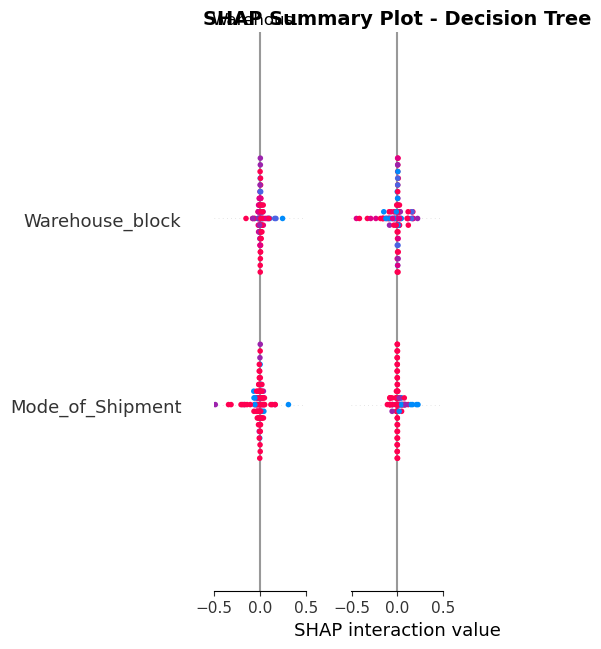


Generating SHAP feature importance plot...


<Figure size 1200x800 with 0 Axes>

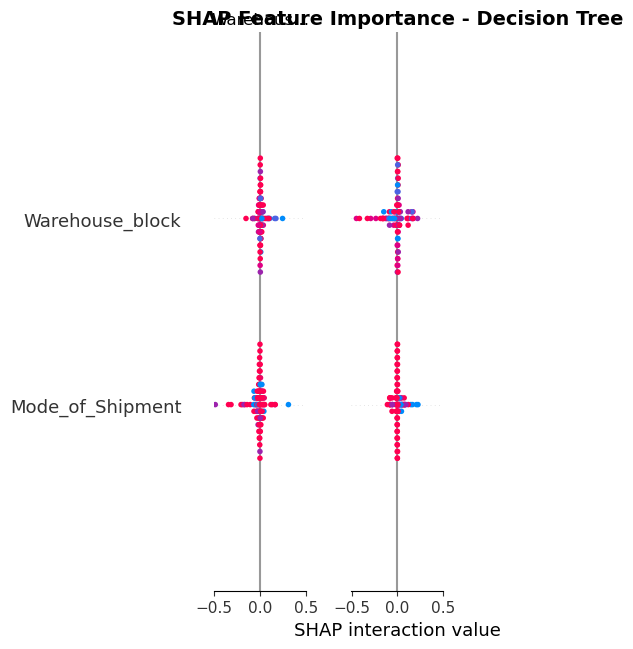


Generating SHAP waterfall plot for sample prediction...
⚠️ SHAP analysis failed: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (10, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.
This may happen with certain model types or configurations.


In [40]:
import shap
print('🔍 SHAP EXPLAINABILITY ANALYSIS')
print('='*50)
print(f'Analyzing: {best_model_name}')
print(f'F1-Score: {best_f1_score:.4f}')

# Create SHAP explainer for best model
try:
    print('\nInitializing SHAP explainer...')
    explainer = shap.Explainer(best_model, X_train_scaled)
    shap_values = explainer(X_test_scaled[:100])  # Use subset for speed

    print('✅ SHAP values computed successfully')

    # SHAP Summary Plot
    print('\nGenerating SHAP summary plot...')
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns, show=False)
    plt.title(f'SHAP Summary Plot - {best_model_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # SHAP Bar Plot
    print('\nGenerating SHAP feature importance plot...')
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns, plot_type='bar', show=False)
    plt.title(f'SHAP Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # SHAP Waterfall Plot for first prediction
    print('\nGenerating SHAP waterfall plot for sample prediction...')
    shap.waterfall_plot(shap_values[0], max_display=15)

except Exception as e:
    print(f'⚠️ SHAP analysis failed: {str(e)}')
    print('This may happen with certain model types or configurations.')